<a href="https://colab.research.google.com/github/anushapriya/AnushaRobotTest/blob/main/Copy_of_intro_to_ai_mor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


In [ ]:
df = pd.DataFrame({
    "hours_of_sleep":[7,6,8,9,3,6,5,7,3,8],
    "cups_of_cofeee":[2,1,2,1,5,4,3,2,6,3],
    "travel_time"   :[25,32,17,25,45,34,26,21,9,12],
    "productivity"  :[85,65,92,91,30,68,59,73,30,97]
})

In [ ]:
df

,hours_of_sleep,cups_of_cofeee,travel_time,productivity
0,7,2,25,85
1,6,1,32,65
2,8,2,17,92
3,9,1,25,91
4,3,5,45,30
5,6,4,34,68
6,5,3,26,59
7,7,2,21,73
8,3,6,9,30
9,8,3,12,97


In [ ]:
features = ["hours_of_sleep","cups_of_cofeee","travel_time"]
X = df[features]
y = df['productivity']

In [ ]:
X

,hours_of_sleep,cups_of_cofeee,travel_time
0,7,2,25
1,6,1,32
2,8,2,17
3,9,1,25
4,3,5,45
5,6,4,34
6,5,3,26
7,7,2,21
8,3,6,9
9,8,3,12


In [ ]:
y

,productivity
0,85
1,65
2,92
3,91
4,30
5,68
6,59
7,73
8,30
9,97


In [ ]:
def custom_neural_network():
    #Input layer
    inputs = keras.Input(shape=(3,))

    #Hiddel layer - Full connection
    x = layers.Dense(2, activation='sigmoid')(inputs)

    #ouput layer
    outputs = layers.Dense(1, activation='linear')(x)

    #combine everylayer as one model
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
model = custom_neural_network()

In [ ]:
#complile the nn
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
             loss = "mean_squared_error")

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11 (44.00 B)

 Trainable params: 11 (44.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X, y, epochs=50,
                    batch_size=2,
                    validation_split=0.10)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3549.3706 - val_loss: 8063.1938
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3431.4614 - val_loss: 8038.5332
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3997.1208 - val_loss: 8013.3638
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4139.6729 - val_loss: 7988.1060
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3423.9353 - val_loss: 7962.9468
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3711.6174 - val_loss: 7937.7969
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3835.6951 - val_loss: 7912.4604
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3514.4856 - val_loss: 7887.4580
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3842.2166 - val_loss: 7862.7339
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3302.2241 - val_loss: 7838.4805
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3722.9285 - val_loss: 7813.6401
Epoch 12/50
5/5 ━━━

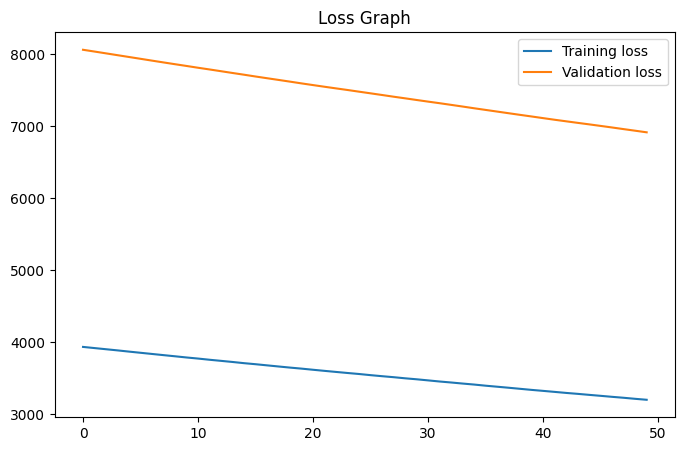

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title("Loss Graph")
plt.legend()

In [ ]:
sample_data = np.array([[10, 20, 5]])
prediction = model.predict(sample_data)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[9.594355]], dtype=float32)

In [ ]:
#neural network

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
from tensorflow import keras

In [ ]:
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [ ]:
# url_2 = "https://raw.githubusercontent.com/parthsharma1011/ML-codes/master/ML/13_kmeans/income.csv"
# df_new = pd.read_csv(url_2)
# df_new.head(2)

In [ ]:
df.head(2)
pd.set_option("display.max_columns",None)

In [ ]:
df.head(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['gender'] = df['gender'].map({'Female':0,"Male":1})
df['Churn'] = df['Churn'].map({"No":0, "Yes":1})

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
#please learn about Recursive feature elimination and apply it by yourself

In [ ]:
features = ['gender','SeniorCitizen','tenure','MonthlyCharges','TotalCharges']
X=df[features]
Y = df['Churn']

In [ ]:
X.head(2)

,gender,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,0,1,29.85,29.85
1,1,0,34,56.95,1889.50


In [ ]:
Y.head(2)

,Churn
0,0
1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.20,
                                                    random_state=42)
#check - usmapl, diwnaplne

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(5,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_scaled, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.20) #verbose =1

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7364 - loss: 0.5220 - val_accuracy: 0.7600 - val_loss: 0.4668
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7781 - loss: 0.4682 - val_accuracy: 0.7947 - val_loss: 0.4448
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7954 - loss: 0.4394 - val_accuracy: 0.7956 - val_loss: 0.4398
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7707 - loss: 0.4577 - val_accuracy: 0.7964 - val_loss: 0.4380
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7887 - loss: 0.4421 - val_accuracy: 0.7938 - val_loss: 0.4328
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7833 - loss: 0.4560 - val_accuracy: 0.7938 - val_loss: 0.4346
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7933 - loss: 0.4445 - val_accuracy: 0.7964 - val_loss: 0.4337
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7987 - loss: 0.4329 - val_accuracy: 0.

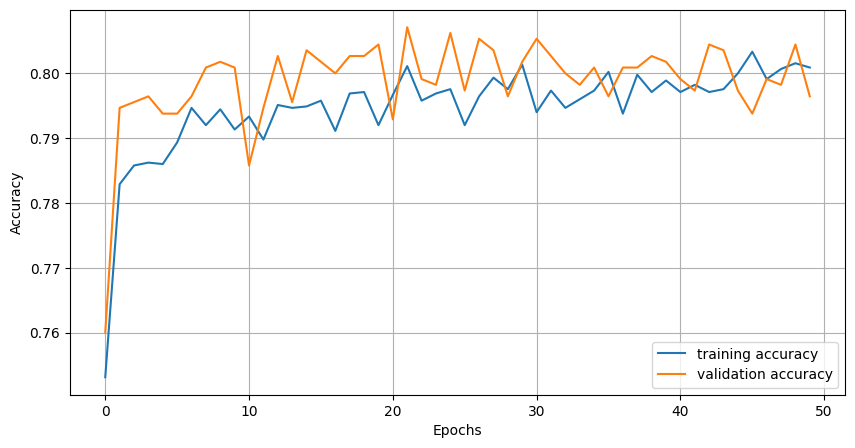

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

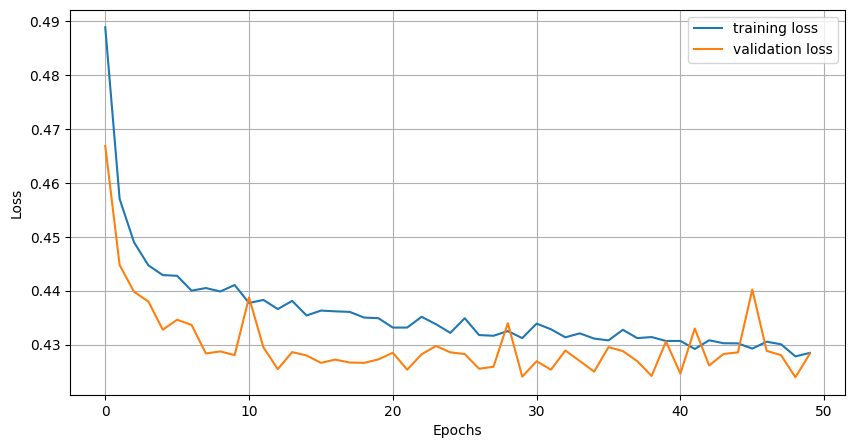

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()

In [ ]:
#make predtion
gender = 0
SeniorCitizen = 0
tenure = 9
MonthlyCharges = 10.25
TotalCharges =220.15

[[]]## 2d

#model.predict
1 - 0 conf:


In [ ]:
import random

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.20,
                                                    random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
def create_model(nuerons_config):
  model = models.Sequential()
  #input layer
  model.add(layers.Dense(nuerons_config[0], activation='relu'))

  for neurons in nuerons_config[1:]:
    model.add(layers.Dense(neurons, activation='relu'))

  model.add(layers.Dense(1, activation='sigmoid'))
  model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
  return model

In [ ]:
def random_search_neurons(n_trails=20):
  layer1_option = [32, 64, 128, 256]
  layer2_option = [16,32,64,128]
  layer3_option = [8,16,32,64]
  layer4_option = [4, 8,16,32]

  results=[]

  for trail in range(n_trails):

    neurons_config = [ random.choice(layer1_option),
                      random.choice(layer2_option),
                      random.choice(layer3_option),
                      random.choice(layer4_option)]

    print(f"\nTrial: {trail+1}: Testing: {neurons_config}")

    model = create_model(neurons_config)

    early_stop = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)


    history = model.fit(X_train_scaled, y_train,
                    epochs=50,   #30 -> 50 20
                    batch_size=32,
                    validation_split=0.20,
                    callbacks=[early_stop])

    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

    results.append({
        "neurons":neurons_config,
        "epochs_trained":len(history.history['loss']),
        "test_loss":test_loss,
        "test_accuracy":test_accuracy
    })

    print(f"Test Accuracy : {test_accuracy}")
  return results


In [ ]:
print(f"Random search with optimal arch")
search_results = random_search_neurons(n_trails=15)

Random search with optimal arch

Trial: 1: Testing: [32, 32, 32, 4]
Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7108 - loss: 0.6045 - val_accuracy: 0.7911 - val_loss: 0.4555
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7918 - loss: 0.4540 - val_accuracy: 0.7973 - val_loss: 0.4408
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7957 - loss: 0.4363 - val_accuracy: 0.7947 - val_loss: 0.4401
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7869 - loss: 0.4432 - val_accuracy: 0.7956 - val_loss: 0.4350
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7847 - loss: 0.4457 - val_accuracy: 0.7991 - val_loss: 0.4361
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7935 - loss: 0.4345 - val_accuracy: 0.7964 - val_loss: 0.4306
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7911 - loss: 0.4371 - val_accuracy: 0.8009 - val_loss: 0.4322
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━

In [ ]:
best_result = max(search_results, key=lambda x : x['test_accuracy'])
worst_result = min(search_results, key=lambda x : x['test_accuracy'])


print(f"========= BEST RESULT ========")
print(f"best_result: {best_result}")
print(f"========= WORST RESULT ========")
print(f"worst_result: {worst_result}")
print(f"========= OVERALL ========")
print(f"Neurons : {best_result['neurons']}")
print(f"Test Accuracy : {best_result['test_accuracy']}")
print(f"Test Loss : {best_result['test_loss']}")

========= BEST RESULT ========
best_result: {'neurons': [32, 32, 32, 4], 'epochs_trained': 50, 'test_loss': 0.47099849581718445, 'test_accuracy': 0.7768301367759705}
========= WORST RESULT ========
worst_result: {'neurons': [256, 32, 8, 32], 'epochs_trained': 50, 'test_loss': 0.47385314106941223, 'test_accuracy': 0.7654584050178528}
========= OVERALL ========
Neurons : [32, 32, 32, 4]
Test Accuracy : 0.7768301367759705
Test Loss : 0.47099849581718445


In [ ]:
#CNN 0 mnist

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#load the data

(train_images, train_labels),(test_images,test_labels) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
train_images[0] #0-1

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [ ]:
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

In [ ]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
len(train_images)

60000

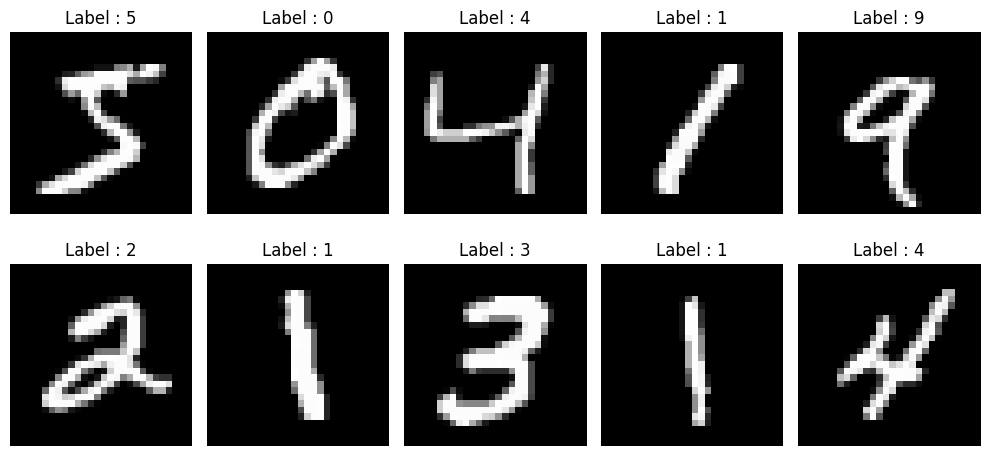

In [ ]:
#see the data
plt.figure(figsize=(10,5))
for i in range(10):
  plt.subplot(2,5,i+1)
  img = train_images[i]
  plt.imshow(img, cmap='gray')
  plt.title(f"Label : {train_labels[i]}")
  plt.axis("off")
plt.tight_layout()

In [ ]:
train_images = train_images.reshape((-1,28,28,1))  #mono channel image yes
test_images = test_images.reshape((-1,28,28,1))

In [ ]:
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [ ]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.10),
    layers.RandomZoom(0.10)
])

In [ ]:
#building yoUR cnn arch

In [ ]:
#random numbers -

def create_model():
  model = models.Sequential([
      data_augmentation,
      #layer-1
      layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
      layers.BatchNormalization(), #this step do not skip
      layers.MaxPooling2D((2,2)), #this step do not skip
      #layer-2
      layers.Conv2D(64, (3,3), activation='relu'),
      layers.BatchNormalization(), #this step do not skip
      layers.MaxPooling2D((2,2)), #this step do not skip
      #layer-3
      layers.Conv2D(64, (3,3), activation='relu'),
      layers.BatchNormalization(), #this step do not skip

      #flatten
      layers.Flatten(),

      #Artificial Neural Network

      layers.Dense(128, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(10, activation='softmax')
  ])
  return model

In [ ]:
model = create_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#call back

early_stopping = callbacks.EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(factor=0.2, patience=3)

In [ ]:
history = model.fit(train_images, train_labels, epochs=30,
                    validation_split=0.10, batch_size=10, callbacks=[early_stopping,reduce_lr])

Epoch 1/30
5400/5400 ━━━━━━━━━━━━━━━━━━━━ 46s 9ms/step - accuracy: 0.9839 - loss: 0.0569 - val_accuracy: 0.9930 - val_loss: 0.0417 - learning_rate: 0.0010
Epoch 2/30
5400/5400 ━━━━━━━━━━━━━━━━━━━━ 91s 10ms/step - accuracy: 0.9850 - loss: 0.0510 - val_accuracy: 0.9905 - val_loss: 0.0473 - learning_rate: 0.0010
Epoch 3/30
5400/5400 ━━━━━━━━━━━━━━━━━━━━ 84s 11ms/step - accuracy: 0.9853 - loss: 0.0529 - val_accuracy: 0.9922 - val_loss: 0.0479 - learning_rate: 0.0010
Epoch 4/30
5400/5400 ━━━━━━━━━━━━━━━━━━━━ 62s 11ms/step - accuracy: 0.9870 - loss: 0.0460 - val_accuracy: 0.9898 - val_loss: 0.0457 - learning_rate: 0.0010
Epoch 5/30
5400/5400 ━━━━━━━━━━━━━━━━━━━━ 66s 9ms/step - accuracy: 0.9879 - loss: 0.0423 - val_accuracy: 0.9925 - val_loss: 0.0416 - learning_rate: 2.0000e-04
Epoch 6/30
5400/5400 ━━━━━━━━━━━━━━━━━━━━ 47s 9ms/step - accuracy: 0.9913 - loss: 0.0327 - val_accuracy: 0.9935 - val_loss: 0.0389 - learning_rate: 2.0000e-04
Epoch 7/30
5400/5400 ━━━━━━━━━━━━━━━━━━━━ 81s 9ms/step - ac

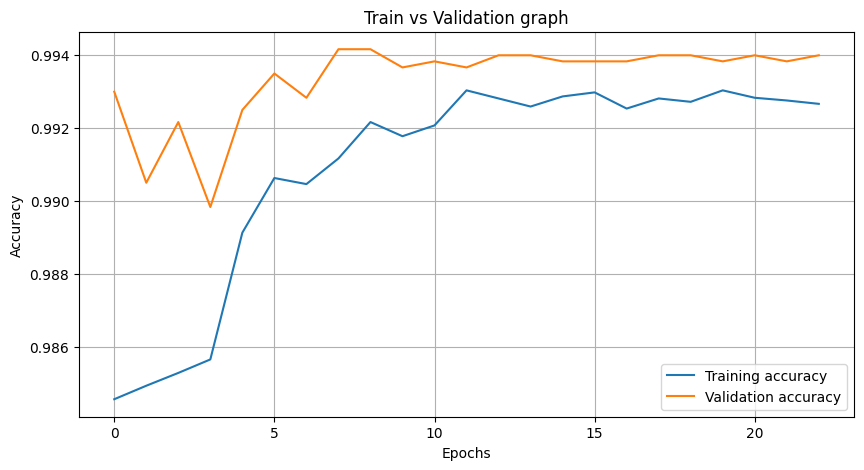

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title("Train vs Validation graph")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

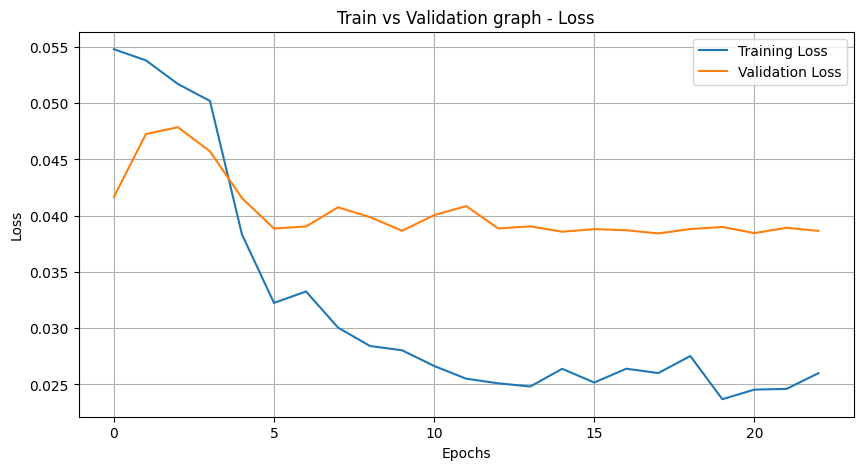

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Train vs Validation graph - Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

In [ ]:
#save your model

In [ ]:
model.save("mnist_cnn_model.keras") #keras

In [ ]:
#load the model
from PIL import Image, ImageOps

In [ ]:
def predict_image(image_path, model):
  #load the image
  img = Image.open(image_path).convert("L") #gray scale
  img = ImageOps.invert(img)
  img = img.resize((28,28))
  img_array = np.array(img)
  img_array = img_array.astype('float32')/255
  img_array = img_array.reshape((1,28,28,1)) #mono

  prediction = model.predict(img_array)
  predicted_class = np.argmax(prediction)
  confidence = np.max(prediction)
  return predicted_class, confidence

In [ ]:
#load and make prediction
def load_model_and_prediction(image_path):
  loaded_model = tf.keras.models.load_model('mnist_cnn_model.keras')
  predicted_class, confidence = predict_image(image_path, loaded_model)
  print(f"Predicted Digit : {predicted_class}")
  print(f"Confidence : {confidence}")
  #plot and vis the data or the image you pass
  img = Image.open(image_path).convert('L')
  plt.imshow(img, cmap='gray')
  plt.title(f"Predicted : {predicted_class} (Confidence : {confidence})")
  plt.axis('off')

In [ ]:
# from google.colab import files
# files.upload()




# [p1,p2,p3,p4]

# for photo in photos:
#   load_model_and_prediction(photo)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
Predicted Digit : 8
Confidence : 0.23934419453144073


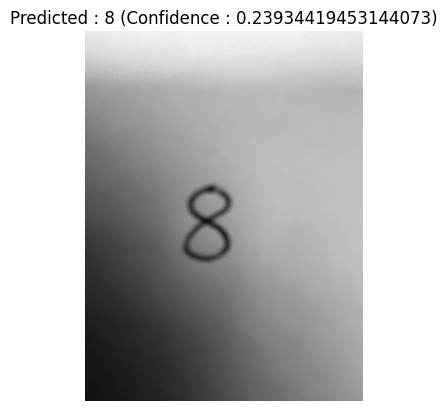

In [ ]:
load_model_and_prediction("IMG_0580.jpg")

In [ ]:
i have been to spain, and i can say this with 100% confidence that i have now learnt to speak spanish

In [ ]:
import numpy as np


def sigmoid(x):
  return (1 / 1 + np.exp(-x))


sigmoid(5.2)

np.float64(1.0055165644207609)

In [ ]:
input gate

i want to know how much of this new memory should be saved! all cannot be important


decide what new information to add in the cell state


outout hate what will be the new cell state and new hidden that can be passed to the next layer

In [ ]:
# from ast import arguments
# #teaching you args and kwargs
# args - arguments
# kwargs - keyword arguments

In [ ]:
def sum(a,b):
  return a+b

num = sum(3,3)#. sum((3,3))
num

args - Variable positional arguments

6

In [ ]:
def calculate_sum(*args):#i do not knpw how many values i will pass whatever i pass take!
  total = 0
  for num in args:
    total+=num
  return total

print(calculate_sum(1,2,3))
print(calculate_sum(1,2,3,4,5,6,7))
print(calculate_sum(3,9,6,-2,4))

6
28
20


In [ ]:
#kwargs
def create_user(**kwargs):
  user={}
  for key, value in kwargs.items():
    user[key] = value
  return user

user_1 = create_user(name='Nagraj', age=25, city = 'Bangalore')
print(user_1)

{'name': 'Nagraj', 'age': 25, 'city': 'Bangalore'}


In [ ]:
user_2 = create_user(name='Bala', age=30, city = 'Bangalore', role='admin',blood_group="ab+")
print(user_2)

{'name': 'Bala', 'age': 30, 'city': 'Bangalore', 'role': 'admin', 'blood_group': 'ab+'}


In [ ]:
## rnn - lstm

In [ ]:
import numpy as np
import pandas as pd
import kagglehub
import os

In [ ]:
path = kagglehub.dataset_download("snap/amazon-fine-food-reviews")
csv_file = os.path.join(path, "Reviews.csv")
df = pd.read_csv(csv_file)
df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [ ]:
#how many starts
df['Score'].value_counts()

#check you null and nan values
df.isna().sum()

,0
Id,0
ProductId,0
UserId,0
ProfileName,26
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,27
Text,0


In [ ]:
df_clean = df[['Text','Score']]
# df_clean.isna().sum() #no values are missing everything is filled
df_clean.head(2)

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1


In [ ]:
#ratings distributions
score_counts = df_clean['Score'].value_counts().sort_index()
for score , count in score_counts.items():
  percentage = (count/len(df_clean))* 100
  print(f"{score} stars : {percentage:.2f} %")

1 stars : 9.19 %
2 stars : 5.24 %
3 stars : 7.50 %
4 stars : 14.19 %
5 stars : 63.88 %


In [ ]:
#score - 1-2 -> neg
# 4-5 -> pos

# drop every 3  neutral    binary classificarion

In [ ]:
df_binary = df_clean[df_clean['Score'] !=3 ].copy() #include 3
df_binary['sentiment'] = (df_binary['Score'] >=4).astype(int)

In [ ]:
df_binary.head(10)

,Text,Score,sentiment
0,I have bought several of the Vitality canned d...,5,1
1,Product arrived labeled as Jumbo Salted Peanut...,1,0
2,This is a confection that has been around a fe...,4,1
3,If you are looking for the secret ingredient i...,2,0
4,Great taffy at a great price. There was a wid...,5,1
5,I got a wild hair for taffy and ordered this f...,4,1
6,This saltwater taffy had great flavors and was...,5,1
7,This taffy is so good. It is very soft and ch...,5,1
8,Right now I'm mostly just sprouting this so my...,5,1
9,This is a very healthy dog food. Good for thei...,5,1


In [ ]:
#pos neg -> data imbalance
print(f"Negative (1-2 star) : {sum(df_binary['sentiment'] == 0):,}")
print(f"Positive (4-5 star) : {sum(df_binary['sentiment'] == 1):,}")

#class imbalance problem

Negative (1-2 star) : 82,037
Positive (4-5 star) : 443,777


In [ ]:
# SMOTE, SMOTES, BASIC TECH -> DOWN SAMPLE THE MAJORITY CLASS
from sklearn.utils import resample

In [ ]:
negative_reviews = df_binary[df_binary['sentiment'] == 0]
positive_reviews = df_binary[df_binary['sentiment'] == 1]

#current imbalance in the data is
print("Current Imbalance")
print(f"Negative: {len(negative_reviews):,} ({len(negative_reviews)/len(df_binary)*100:.2f}%)")
print(f"Positive: {len(positive_reviews):,} ({len(positive_reviews)/len(df_binary)*100:.2f}%)")


#handle class imbalalance
#Undersample the majprity class to match minority class
n_minority = len(negative_reviews)
positive_downsampled = resample(positive_reviews,
                                replace=False, #sample without replacement
                                n_samples=n_minority,
                                random_state=42)
df_balanced = pd.concat([negative_reviews,positive_downsampled])

#shuffl;ing the entire data
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print("After Imbalance")
print(f"Negative: {sum(df_balanced['sentiment'] == 0):,} ({sum(df_balanced['sentiment'] == 0)/len(df_balanced)*100:.2f}%)")
print(f"Positive: {sum(df_balanced['sentiment'] == 1):,} ({sum(df_balanced['sentiment'] == 1)/len(df_balanced)*100:.2f}%)")

Current Imbalance
Negative: 82,037 (15.60%)
Positive: 443,777 (84.40%)
After Imbalance
Negative: 82,037 (50.00%)
Positive: 82,037 (50.00%)


In [ ]:
df_balanced.head(2)

,Text,Score,sentiment
0,"First of all, let me say that my dog likes the...",2,0
1,"I had really high hopes for this coffee, it sm...",1,0


In [ ]:
st = df_balanced['Text'][0]

In [ ]:
import re

In [ ]:
def clean_text(text):
  #convert text into lowercase
  text = text.lower()
  #remove special characters, numbers, but keep only letters and space
  text = re.sub(r'[^a-zA-Z\s]','',text)
  #remove extra white space
  text = ' '.join(text.split())
  return text

In [ ]:
st

'First of all, let me say that my dog likes the taste of this treat - a lot. However, I have a large dog...and evidently an impatient dog. Rather than lick this "roll-on" treat, she would rather just bite it and chew it. That\'s really the only down side. Found out my daughters kitten liked it too. It\'s weird, like a 1980\'s deodorant company trying to do something profitable with their out of date product line. I wouldn\'t buy it, but my pets liked it.'

In [ ]:
clean_text(st)

'first of all let me say that my dog likes the taste of this treat a lot however i have a large dogand evidently an impatient dog rather than lick this rollon treat she would rather just bite it and chew it thats really the only down side found out my daughters kitten liked it too its weird like a s deodorant company trying to do something profitable with their out of date product line i wouldnt buy it but my pets liked it'

In [ ]:
df_balanced['clean_text'] = df_balanced['Text'].apply(clean_text)

In [ ]:
df_balanced.head(2)

,Text,Score,sentiment,clean_text
0,"First of all, let me say that my dog likes the...",2,0,first of all let me say that my dog likes the ...
1,"I had really high hopes for this coffee, it sm...",1,0,i had really high hopes for this coffee it sme...


In [ ]:
#prepare our data for the RNN and LSTM

In [ ]:
# ["I love machine learning",
#  "machine learning is really awesome",
#  "I love learning"]


# #vocab - 3
#  {
#      "Learning":3,
#      "I":2,
#      love:2
#      "machine":2,
#      is:1,
#      awesome:1

#  }

#  #tokenization
# st = "i love india"
# st.split()

In [ ]:
MAX_FEATURES = 10000    # vocab size of 10,000 words
MAX_LEN = 100   #max sequence of lengtrh (num of words i will use per review)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
#prepare data
X = df_balanced['clean_text'].values #features
y = df_balanced['sentiment'].values #target

In [ ]:
tokenizer = Tokenizer(num_words=MAX_FEATURES, oov_token='<OOV>')
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_sequences, maxlen=MAX_LEN, padding='post',truncating='post')

In [ ]:
print(f"Tokenization complete!")
print(f"Actual vocabulary size : {len(tokenizer.word_index):,} words")
print(f"Final sequence shape : {X_padded.shape}")

Tokenization complete!
Actual vocabulary size : 114,373 words
Final sequence shape : (164074, 100)


In [ ]:
print(f"Original Text : {X[0][:100]}")
print(f"Sequence : {X_sequences[0][:20]}")

Original Text : first of all let me say that my dog likes the taste of this treat a lot however i have a large dogan
Sequence : [97, 8, 40, 420, 49, 168, 13, 14, 95, 568, 2, 32, 8, 9, 256, 5, 190, 169, 3, 18]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_padded, y,
    test_size=0.20,
    random_state=42,
    stratify=y #maintain class balance
)

#go the extra mile
train_pos = sum(y_train)
test_pos = sum(y_test)

print(f"")
print(f"Training : Positive: {train_pos:,} ({train_pos/len(y_train)*100:.1f}%)")
print(f"Testing : Positive: {test_pos:,} ({test_pos/len(y_test)*100:.1f}%)")


Training : Positive: 65,630 (50.0%)
Testing : Positive: 16,407 (50.0%)


In [ ]:
#RNN

In [ ]:
def create_rnn_model():
  model = Sequential([
      #Embedding layer - convert word indices to dense vector
      Embedding(input_dim=MAX_FEATURES, output_dim=128, input_length=MAX_LEN),

      #RNN Layer
      SimpleRNN(units=64, return_sequences=False),

      #Dropout layer
      Dropout(0.5),

      Dense(32, activation='relu'),

      Dense(1, activation='sigmoid')
  ])
  return model

In [ ]:
rnn_model = create_rnn_model()

#compile
rnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
#train my model
rnn_history = rnn_model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=5,
    validation_split=0.20,
)

Epoch 1/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.5161 - loss: 0.6949 - val_accuracy: 0.6315 - val_loss: 0.6559
Epoch 2/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5999 - loss: 0.6675 - val_accuracy: 0.6322 - val_loss: 0.6487
Epoch 3/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.6513 - loss: 0.6247 - val_accuracy: 0.5704 - val_loss: 0.6640
Epoch 4/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5967 - loss: 0.6191 - val_accuracy: 0.5704 - val_loss: 0.6943
Epoch 5/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.6377 - loss: 0.5623 - val_accuracy: 0.5668 - val_loss: 0.7198


In [ ]:
import matplotlib.pyplot as plt
# rnn_history.history

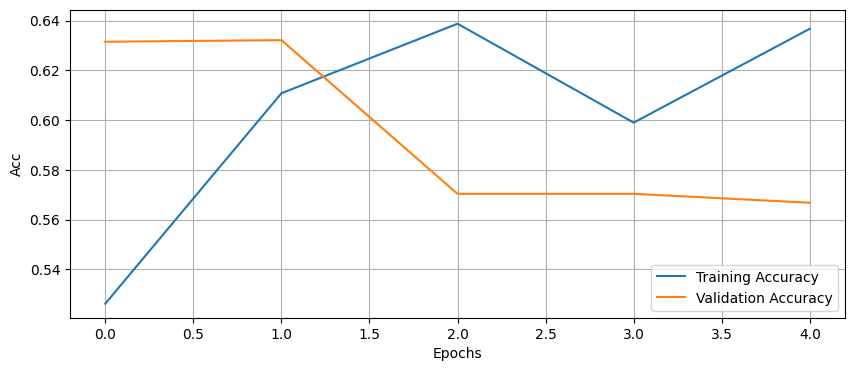

In [ ]:
plt.figure(figsize=(10,4))

plt.plot(rnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend()
plt.grid()

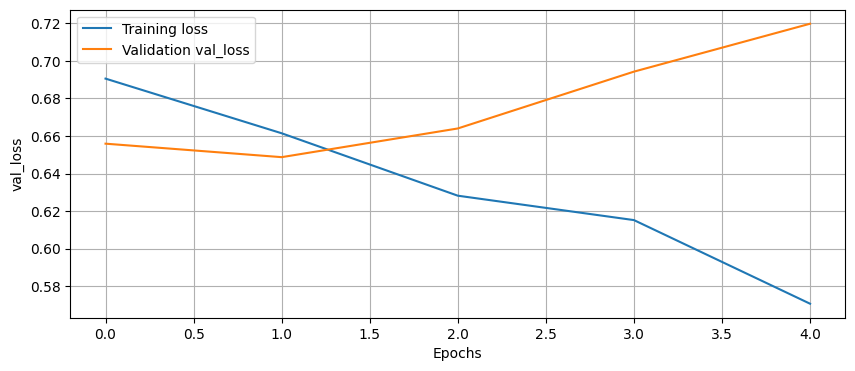

In [ ]:
plt.figure(figsize=(10,4))

plt.plot(rnn_history.history['loss'], label='Training loss')
plt.plot(rnn_history.history['val_loss'], label='Validation val_loss')
plt.xlabel("Epochs")
plt.ylabel("val_loss")
plt.legend()
plt.grid()

# LSTM

In [ ]:
def create_lstm_model():
  model = Sequential([
      #Embedding layer - convert word indices to dense vector
      Embedding(input_dim=MAX_FEATURES, output_dim=128, input_length=MAX_LEN),

      #RNN Layer
      LSTM(units=64, return_sequences=False),

      #Dropout layer
      Dropout(0.5),

      Dense(32, activation='relu'),

      Dense(1, activation='sigmoid')
  ])
  return model

In [ ]:
lstm_model = create_lstm_model()

#compile
lstm_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [ ]:
#train my model
lstm_history = lstm_model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=5,
    validation_split=0.20,
)

Epoch 1/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.5405 - loss: 0.6827 - val_accuracy: 0.5622 - val_loss: 0.6685
Epoch 2/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5869 - loss: 0.6375 - val_accuracy: 0.8772 - val_loss: 0.3049
Epoch 3/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9001 - loss: 0.2610 - val_accuracy: 0.9102 - val_loss: 0.2305
Epoch 4/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9331 - loss: 0.1829 - val_accuracy: 0.9178 - val_loss: 0.2168
Epoch 5/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9506 - loss: 0.1407 - val_accuracy: 0.9217 - val_loss: 0.2174


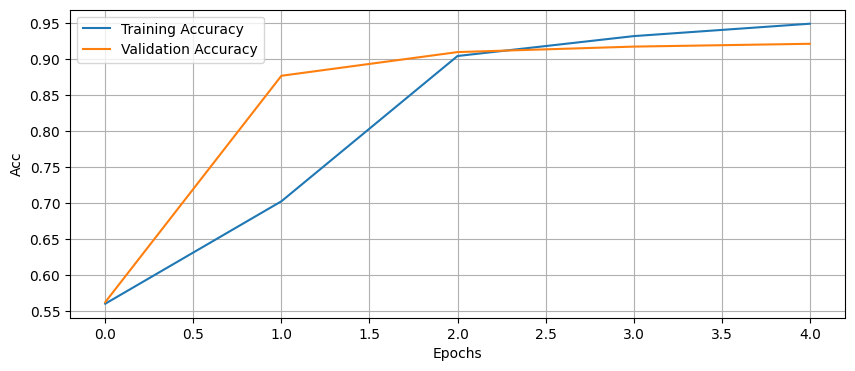

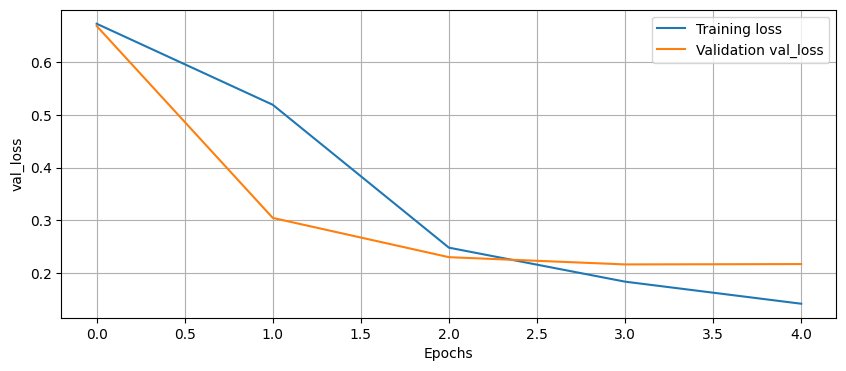

In [ ]:
plt.figure(figsize=(10,4))

plt.plot(lstm_history.history['accuracy'], label='Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend()
plt.grid()


plt.figure(figsize=(10,4))
plt.plot(lstm_history.history['loss'], label='Training loss')
plt.plot(lstm_history.history['val_loss'], label='Validation val_loss')
plt.xlabel("Epochs")
plt.ylabel("val_loss")
plt.legend()
plt.grid()

In [ ]:
#hyper paramter search - random search

In [ ]:
param_grid = {
    'model_type':['rnn','lstm'],
    'embedding_dim':[32,64,128],
    'units':[32,64,128],
    'dropout_rate':[0.3,0.5],
    'learning_rate':[0.001,0.01,0.1]
}

print(f"===============Search space:===============")
for param, values in param_grid.items():
  print(f"  {param}: {values}\n")


total_combinations = 1

for values in param_grid.values():
  total_combinations *= len(values)
print(f"Total Combinations : {total_combinations}")



===============Search space:===============
  model_type: ['rnn', 'lstm']

  embedding_dim: [32, 64, 128]

  units: [32, 64, 128]

  dropout_rate: [0.3, 0.5]

  learning_rate: [0.001, 0.01, 0.1]

Total Combinations : 108


In [ ]:
# text = "Rudra sharma"
# width = 80

# print(f"{'='*width}")
# print(f"{text:=^{width}}")

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
#OOP - python

def create_model_with_params(model_type='lstm', embedding_dim=128, units=64, dropout_rate=0.5, learning_rate=0.001):
  model = Sequential([
      Embedding(MAX_FEATURES, embedding_dim, input_length=MAX_LEN)
  ])

  if model_type == 'lstm':
    model.add(LSTM(units, return_sequences=False))
  else:
    model.add(SimpleRNN(units,return_sequences=False))

  model.add(Dropout(dropout_rate))
  model.add(Dense(32,activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(
      optimizer = Adam(learning_rate=learning_rate),
      loss = 'binary_crossentropy',
      metrics = ['accuracy']
  )
  return model

In [ ]:
def random_search(n_trials=8):
  results = []
  np.random.seed(42)
  print(f"Testing {n_trials} random parameter combinations......")

  for i in range(n_trials):
    params = {
    'model_type':str(np.random.choice(param_grid['model_type'])),
    'embedding_dim':int(np.random.choice(param_grid['embedding_dim'])),
    'units':int(np.random.choice(param_grid['units'])),
    'dropout_rate':float(np.random.choice(param_grid['dropout_rate'])),
    'learning_rate':float(np.random.choice(param_grid['learning_rate']))
    }
    print(f"\n--- Trial {i+1}/{n_trials} ---")
    print(f"Paramteres : {params}")

    try:
      model = create_model_with_params(**params)
      history = model.fit(
          X_train, y_train,
          batch_size = 128,
          epochs=10,
          validation_split= 0.20,
      )
      val_accuracy = max(history.history['val_accuracy'])

      results.append({
          'trail':i+1,
          'params':params,
          'val_accuracy':val_accuracy,
          "model":model
      })

      print(f"Validation Accuracy : {val_accuracy:.2f}")
    except Exception as e:
      print(f"Error in trial {i+1} : {e}")
      continue
  return results

In [ ]:
search_results = random_search(8)

Testing 8 random parameter combinations......

--- Trial 1/8 ---
Paramteres : {'model_type': 'rnn', 'embedding_dim': 32, 'units': 128, 'dropout_rate': 0.3, 'learning_rate': 0.001}
Epoch 1/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.5019 - loss: 0.7085 - val_accuracy: 0.4995 - val_loss: 0.6932
Epoch 2/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.4997 - loss: 0.6948 - val_accuracy: 0.4996 - val_loss: 0.6930
Epoch 3/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5016 - loss: 0.6937 - val_accuracy: 0.5003 - val_loss: 0.6940
Epoch 4/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.5011 - loss: 0.6933 - val_accuracy: 0.4996 - val_loss: 0.6932
Epoch 5/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.5023 - loss: 0.6936 - val_accuracy: 0.4994 - val_loss: 0.6937
Epoch 6/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.5048 - loss: 0.6935 - val_accuracy: 0.5289 - val_loss: 0.6928
Epoch 7/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
#find the best params

In [ ]:
if search_results:
  best_result = max(search_results, key=lambda x: x['val_accuracy'])

  print("All trial results...")
  for result in search_results:
    trail = result['trail']
    acc = result['val_accuracy']
    model_type = result['params']['model_type']
    print(f"Trial {trail}: {model_type.upper()} - Accuracy : {acc:.3f}\n")

    print("Best configurations for the models are.....")
    print(f"Trail : {best_result['trail']}")
    print(f"Parameters : {best_result['params']}")
    print(f"Validation Accuracy : {best_result['val_accuracy']}")


All trial results...
Trial 1: RNN - Accuracy : 0.586

Best configurations for the models are.....
Trail : 4
Parameters : {'model_type': 'lstm', 'embedding_dim': 32, 'units': 64, 'dropout_rate': 0.5, 'learning_rate': 0.01}
Validation Accuracy : 0.9177967309951782
Trial 2: RNN - Accuracy : 0.509

Best configurations for the models are.....
Trail : 4
Parameters : {'model_type': 'lstm', 'embedding_dim': 32, 'units': 64, 'dropout_rate': 0.5, 'learning_rate': 0.01}
Validation Accuracy : 0.9177967309951782
Trial 3: RNN - Accuracy : 0.510

Best configurations for the models are.....
Trail : 4
Parameters : {'model_type': 'lstm', 'embedding_dim': 32, 'units': 64, 'dropout_rate': 0.5, 'learning_rate': 0.01}
Validation Accuracy : 0.9177967309951782
Trial 4: LSTM - Accuracy : 0.918

Best configurations for the models are.....
Trail : 4
Parameters : {'model_type': 'lstm', 'embedding_dim': 32, 'units': 64, 'dropout_rate': 0.5, 'learning_rate': 0.01}
Validation Accuracy : 0.9177967309951782
Trial 5: L

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import pickle
import os

In [ ]:
#save your model
if search_results:
  best_params = best_result['params']
  print(f"final training of the model with high epochs")

  best_model = create_model_with_params(**best_params)

  callbacks = [
      ModelCheckpoint(
          "best_amazon_sentiment_model.h5",
          monitor='val_accuracy',
          save_best_only=True,
          mode='max',
          verbose=1
      ),
      EarlyStopping(
          monitor='val_loss',
          patience = 3,
          restore_best_weights=True,
          verbose=1
      )
  ]

  print(f"having one last final training with the best model...")
  final_history = best_model.fit(
      X_train, y_train,
      batch_size=128,
      epochs=50,
      validation_split = 0.2,
      callbacks = callbacks,
      verbose=1
  )

  with open("amazon_sentiment_tokenizer.pkl",'wb') as f:
    pickle.dump(tokenizer, f)

  print(f"final model ran and saved the tokenizer....")
else:
  print(f"Cannot train the model - no succesfull results")

final training of the model with high epochs
having one last final training with the best model...
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


821/821 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5924 - loss: 0.6281
Epoch 1: val_accuracy improved from -inf to 0.89102, saving model to best_amazon_sentiment_model.h5


821/821 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5925 - loss: 0.6280 - val_accuracy: 0.8910 - val_loss: 0.2741
Epoch 2/50
821/821 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9042 - loss: 0.2478
Epoch 2: val_accuracy improved from 0.89102 to 0.90755, saving model to best_amazon_sentiment_model.h5


821/821 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9042 - loss: 0.2478 - val_accuracy: 0.9075 - val_loss: 0.2468
Epoch 3/50
818/821 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9285 - loss: 0.1883
Epoch 3: val_accuracy improved from 0.90755 to 0.91380, saving model to best_amazon_sentiment_model.h5


821/821 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9285 - loss: 0.1884 - val_accuracy: 0.9138 - val_loss: 0.2230
Epoch 4/50
819/821 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9427 - loss: 0.1559
Epoch 4: val_accuracy did not improve from 0.91380
821/821 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9427 - loss: 0.1559 - val_accuracy: 0.9116 - val_loss: 0.2355
Epoch 5/50
817/821 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9545 - loss: 0.1259
Epoch 5: val_accuracy did not improve from 0.91380
821/821 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9544 - loss: 0.1260 - val_accuracy: 0.9138 - val_loss: 0.2446
Epoch 6/50
815/821 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9596 - loss: 0.1140
Epoch 6: val_accuracy did not improve from 0.91380
821/821 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9595 - loss: 0.1141 - val_accuracy: 0.9100 - val_loss: 0.2471
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 3.
final model ran and saved the tok

In [ ]:

#load my model
loaded_model = load_model("best_amazon_sentiment_model.h5") #.keras

#load the tokenizer
with open("amazon_sentiment_tokenizer.pkl", 'rb') as f:
  loaded_tokenizer = pickle.load(f)

# r-  read
# w - write
# rb - read binary.
# wb - write binary.

In [ ]:
y_pred_prob = loaded_model.predict(X_test)

1026/1026 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step


In [ ]:
y_pred = (y_pred_prob > 0.5).astype(int).flatten()
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
test_Accuracy = accuracy_score(y_test,y_pred)
test_Accuracy

0.9120219411854334

In [ ]:
def predict_sentiment(text):
  clean = clean_text(text)
  sequence = loaded_tokenizer.texts_to_sequences([clean])
  padded = pad_sequences(sequence, maxlen=MAX_LEN, padding='post')
  prob = loaded_model.predict(padded, verbose=0)[0][0]
  sentiment = "Positive" if prob > 0.5 else "Negative"
  return sentiment, prob

In [ ]:
test_sentences = [
    "This product is amazing! I love it!",
    "the product is worst",
    "I have been using the product for quite some time now! i can say this has been a puchase useful one",
    "Product is compact and easy to use but needs more improvement in design",
    "The earbuds fit comfortably and securely, even during workouts, and the touch controls are responsive once you get used to them. Battery life is solid.",
    "I assume that, this product full fill my requirement but after buying this i thought that all the companies are cheating the customers.... pleases dont by this product any one by seeing the advertisement",
    "I've been using the XYZ Bluetooth Headphones for the past two weeks, and overall, I'm quite pleased with them, especially considering their price point. The sound quality is surprisingly good."
]

In [ ]:
for i, sentence in enumerate(test_sentences):
  sentiment, probability = predict_sentiment(sentence)
  print(f"\nSentence {i+1}: '{sentence}'")
  print(f"Prediction: {sentiment} (Probability: {probability:.2f})")


Sentence 1: 'This product is amazing! I love it!'
Prediction: Positive (Probability: 0.99)

Sentence 2: 'the product is worst'
Prediction: Negative (Probability: 0.02)

Sentence 3: 'I have been using the product for quite some time now! i can say this has been a puchase useful one'
Prediction: Positive (Probability: 0.77)

Sentence 4: 'Product is compact and easy to use but needs more improvement in design'
Prediction: Positive (Probability: 0.95)

Sentence 5: 'The earbuds fit comfortably and securely, even during workouts, and the touch controls are responsive once you get used to them. Battery life is solid.'
Prediction: Negative (Probability: 0.31)

Sentence 6: 'I assume that, this product full fill my requirement but after buying this i thought that all the companies are cheating the customers.... pleases dont by this product any one by seeing the advertisement'
Prediction: Negative (Probability: 0.12)

Sentence 7: 'I've been using the XYZ Bluetooth Headphones for the past two wee

In [ ]:
venv = conda activate (env) one
venv-2 numpy

pip install numpy
2

In [ ]:
final hidden state from the encoder rnn
can be viewed as thought vector or an embedding of the source sentence

In [ ]:
data = [
    ("i am happy","मैं खुश हूँ"),
    ("you are sad","आप दुखी हैं"),
    ("i am cold","मुझे ठंड लग रही है")
]

In [ ]:
source = [<sos>,i, am, happy,<eos>].     [1, 3, 4, 5, 2]
         [<sos>, you ,are , sad,<eos>]   [1, 6, 7, 8, 2]
         [<sos>, i , am , cold,<eos>].   [1, 3, 4, 9, 2]

# padding ? no bec all eng sentn were eqall in leng

In [ ]:
target = [<sos>, मैं, खुश, हूँ, <eos>,<pad>, <pad>].           [1, 4, 5, 6, 2, 0, 0]
         [<sos>, आप , दुखी,  हैं, <eos>, <pad>, <pad>]       [1, 7, 8, 3, 2, 0, 0 ]
         [<sos>, मुझे, ठंड, लग, रही , है, <eos>]               [1, 9, 10, 11, 12, 3 ,2]

In [ ]:
from collections import Counter

text = "satriakal world"
char_count = Counter(text)
char_count

words = ['abhilasha',"esha","saroja",'esha','vaibhav']
word_count = Counter(words)
word_count

Counter({'abhilasha': 1, 'esha': 2, 'saroja': 1, 'vaibhav': 1})

In [ ]:
import tensorflow as tf
import numpy as np
from collections import Counter
import random

In [ ]:
data = [
    ("i am happy","मैं खुश हूँ"),
    ("you are sad","आप दुखी हैं"),
    ("i am cold","मुझे ठंड लग रही है"),
    ("we are hungry","हम भूखें है")
]

In [ ]:
def build_vocab(sentences, lang):
  tokens = Counter()
  for sent in sentences:
    tokens.update(sent.split())
  vocab = {"<PAD>":0, "<SOS>":1, "<EOS>":2}
  for i, token in enumerate(tokens.keys(), 3):
    vocab[token] = i
  return vocab

In [ ]:
eng_sent = [pair[0] for pair in data]
hind_sent = [pair[1] for pair in data]
print(hind_sent)

['मैं खुश हूँ', 'आप दुखी हैं', 'मुझे ठंड लग रही है', 'हम भूखें है']


In [ ]:
print(eng_sent)

['i am happy', 'you are sad', 'i am cold', 'we are hungry']


In [ ]:
eng_vocab = build_vocab(eng_sent, "eng")
hind_vocab = build_vocab(hind_sent, "hin")

In [ ]:
print(eng_vocab)

{'<PAD>': 0, '<SOS>': 1, '<EOS>': 2, 'i': 3, 'am': 4, 'happy': 5, 'you': 6, 'are': 7, 'sad': 8, 'cold': 9, 'we': 10, 'hungry': 11}


In [ ]:
print(hind_vocab)

{'<PAD>': 0, '<SOS>': 1, '<EOS>': 2, 'मैं': 3, 'खुश': 4, 'हूँ': 5, 'आप': 6, 'दुखी': 7, 'हैं': 8, 'मुझे': 9, 'ठंड': 10, 'लग': 11, 'रही': 12, 'है': 13, 'हम': 14, 'भूखें': 15}
